In [7]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [12]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [13]:
# our layers 
x = Flatten()(vgg.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4074 images belonging to 2 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1068 images belonging to 2 classes.


In [13]:



# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
128/128 [==============================] - 2295s 18s/step - loss: 0.4123 - acc: 0.8042 - val_loss: 0.9287 - val_acc: 0.6564
Epoch 2/5
128/128 [==============================] - 2292s 18s/step - loss: 0.3112 - acc: 0.8598 - val_loss: 0.4756 - val_acc: 0.8090
Epoch 3/5
128/128 [==============================] - 2294s 18s/step - loss: 0.3006 - acc: 0.8693 - val_loss: 0.4283 - val_acc: 0.8305
Epoch 4/5
128/128 [==============================] - 2288s 18s/step - loss: 0.2820 - acc: 0.8822 - val_loss: 0.4187 - val_acc: 0.8043
Epoch 5/5
128/128 [==============================] - 2289s 18s/step - loss: 0.2698 - acc: 0.8860 - val_loss: 0.3496 - val_acc: 0.8521


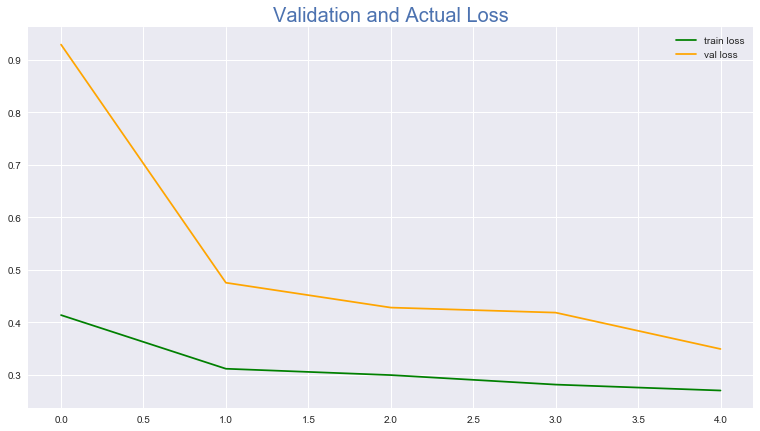

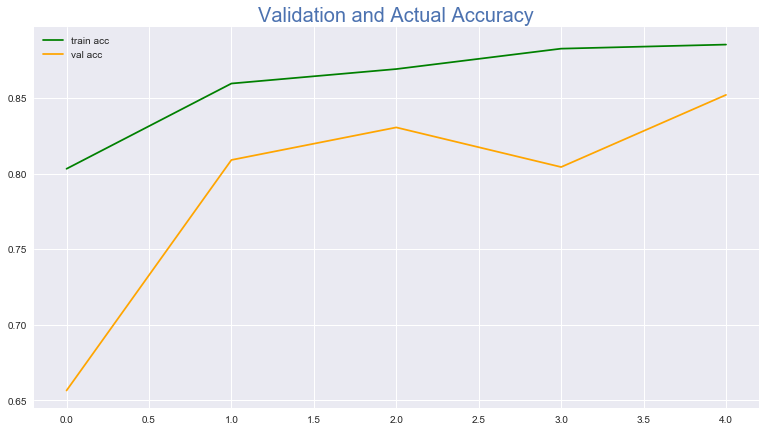

In [158]:

import matplotlib as mpl

def plotgraph(trainlossacc,labeltrain,vallossacc,labelval,title,filename):
    mpl.style.use('seaborn')
    plt.figure(figsize=(13,7))
    plt.plot(r.history[trainlossacc], label=labeltrain,color='green')
    plt.plot(r.history[vallossacc], label=labelval,color='orange')
    plt.title(title,fontsize=20,color='C6')
    plt.legend()
    plt.savefig(filename)
    plt.show()
    
plotgraph('loss','train loss','val_loss','val loss','Validation and Actual Loss','LossVal_loss.png')
plotgraph('acc','train acc','val_acc','val acc','Validation and Actual Accuracy','AccVal_acc.png')

In [135]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [2]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

Using TensorFlow backend.


In [3]:
mymodel = load_model('model_vgg16.h5') 
img =image.load_img('Datasets/valid/Benign/13403_idx5_x1251_y251_class0.png',target_size=(224,224)) 
input_img = image.img_to_array(img) 
input_img = np.expand_dims(input_img,axis=0) 
img_data = preprocess_input(input_img) 
classes = mymodel.predict(img_data).tolist()
getindex= np.argmax(classes)
if (getindex==0):
    result = "Benign"
else:
    result = "Malignant"
print(classes,result)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[[1.0, 3.0985732864851044e-18]] Benign


In [4]:
img =image.load_img('Datasets/valid/Malignant/13403_idx5_x1251_y801_class1.png',target_size=(224,224)) 
input_img = image.img_to_array(img) 
input_img = np.expand_dims(input_img,axis=0) 
img_data = preprocess_input(input_img) 
classes = mymodel.predict(img_data).tolist()
getindex= np.argmax(classes)
if (getindex==0):
    result = "Benign"
else:
    result = "Malignant"
print(classes,result)

[[0.17522071301937103, 0.8247792720794678]] Malignant


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [20]:
valid_datagen = ImageDataGenerator(rescale = 1./255)
valid_set = test_datagen.flow_from_directory('Datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
valid_imgs,valid_labels = next(valid_set)

Found 312 images belonging to 2 classes.


In [ ]:
valid_labels = valid_labels[:,0]
valid_labels

In [21]:
predictions = mymodel.predict_generator(valid_set,steps=1,verbose=0)


In [25]:
valid_labels.argmax(axis=1)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [23]:
predictions.argmax(axis=1)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [119]:
cm=[]
for i in range(32):
    cm.append(np.argmax(predictions[i]))


In [126]:
print(f'prediction: {cm}\nreal values:{valid_labels}')

prediction: [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]
real values:[0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1.]


In [ ]:
confusion_matrix()